Name: Beaverly Cuasi

First, let's input the necessary libraries. 

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read File 

Now we need to read the downloaded file of the geometric administrative boundaries of the Philippines from GADM

In [2]:
# Read shapefile
ph = gpd.read_file('./gadm36_PHL_shp/gadm36_PHL_1.shp')

ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


### Plot 

Then plot the map of the Philippines

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

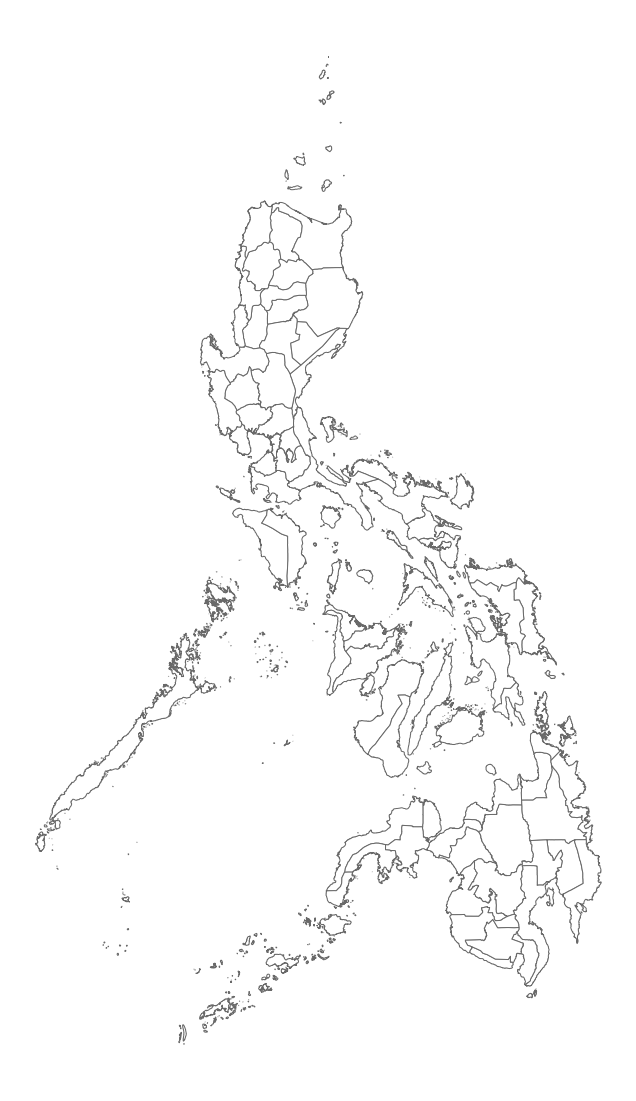

In [3]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [4]:
healthsites = gpd.read_file('./philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


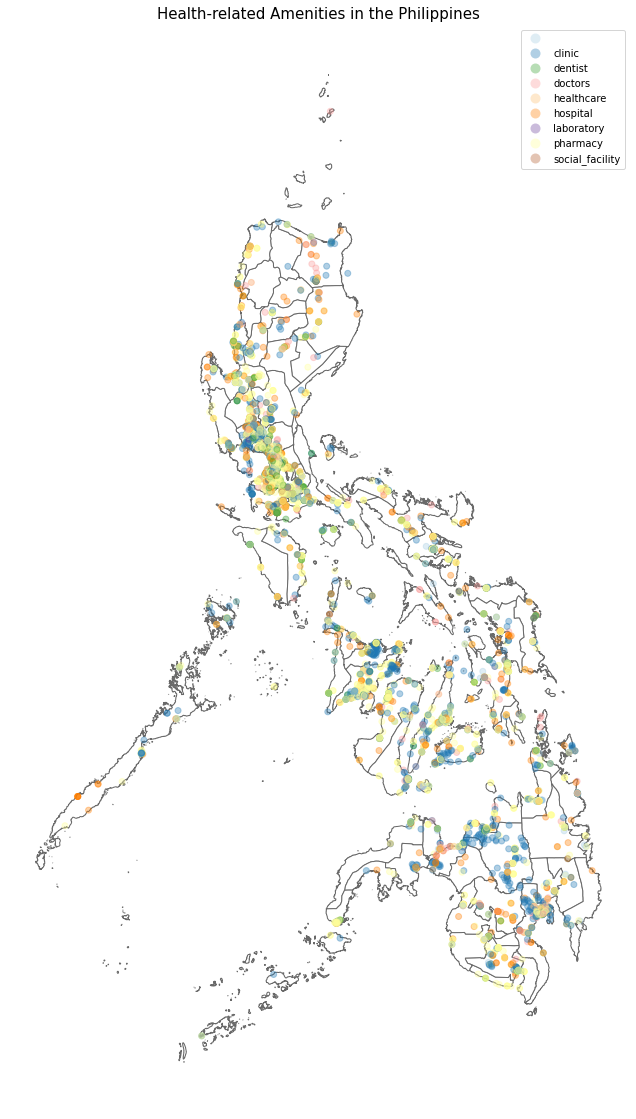

In [5]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

Here we can see the health amenities on different places of the Philippines

###  Health Amenities in Metro Manila

I'm currently residing here in Metro Manila so let's find the health amenities here. First, let's plot only the Metro Manila from the whole map 

<AxesSubplot:>

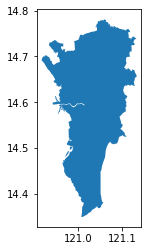

In [6]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

Then, find the health sites within Metro Manila 

In [7]:
mm_within = gpd.sjoin(healthsites, mm, op='within')
mm_within.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
12,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
15,796284976,way,9.0,,dentist,,,,,84795442.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
18,1337361512,node,12.0,,pharmacy,,,,,18298881.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
21,7418383285,node,9.0,,pharmacy,,,,,83760358.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


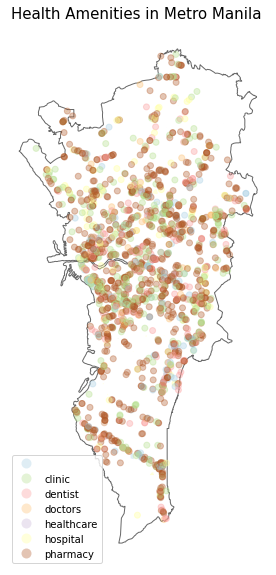

In [8]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax,column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health Amenities in Metro Manila ', fontsize=15)
ax.axis('off');

Now we have the visualization for the health sites in Metro Manila. Because Metro Manila is the National Capital Region, we expected that there are a lot of health amenities here. 

### Health Amenities in Cagayan Valley

Next, my relatives currently reside in Aparri, Cagayan so let's see how many health sites are in the province by excluding only the plot of Cagayan from the whole map. 

<AxesSubplot:>

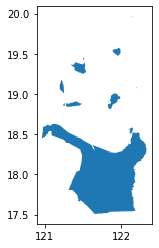

In [9]:
cag = ph[ph.NAME_1=="Cagayan"]
cag.plot()

In [10]:
cag_within = gpd.sjoin(healthsites, cag, op='within')
cag_within.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,PHL,Philippines,PHL.18_1,Cagayan,None,None,Lalawigan|Probinsya,Province,215,PH.CG
355,267445065,way,9.0,,hospital,,,,,62968635.0,...,PHL,Philippines,PHL.18_1,Cagayan,None,None,Lalawigan|Probinsya,Province,215,PH.CG
464,249383884,way,12.0,,hospital,,,,,19211605.0,...,PHL,Philippines,PHL.18_1,Cagayan,None,None,Lalawigan|Probinsya,Province,215,PH.CG
560,4305669974,node,9.0,,pharmacy,,,,,40776775.0,...,PHL,Philippines,PHL.18_1,Cagayan,None,None,Lalawigan|Probinsya,Province,215,PH.CG
583,5930953971,node,9.0,,clinic,,,,,62938629.0,...,PHL,Philippines,PHL.18_1,Cagayan,None,None,Lalawigan|Probinsya,Province,215,PH.CG


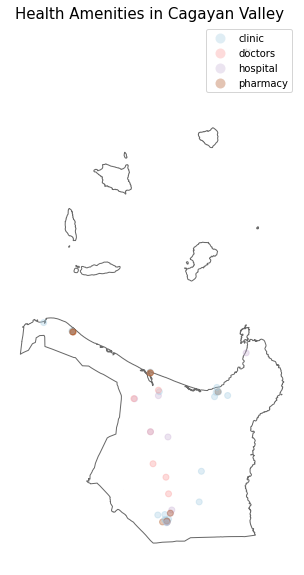

In [11]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cag.plot(ax=ax, color='white', edgecolor='dimgray')
cag_within.plot(ax=ax,column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health Amenities in Cagayan Valley ', fontsize=15)
ax.axis('off');

Finally, here is the visualization of the health amenities in Cagayan Valley. It is only few compared to Metro Manila. 